## SUSSIDI IN ITALIA PER IL MONDO AGRICOLO

Andiamo ora ad analizzare la suddivisione interna all'Italia dei sussidi per l'agricoltura, che prende il nome di "Government Expenditure and the Agriculture Value", o GEA. 
Di questi dati ne tiene traccia la FAO, in partnership con il Fondo Monetario Internazionale. 

https://fenixservices.fao.org/faostat/static/documents/IG/IG_Country_Notes_e.pdf

Abbiamo visto che una parte dei fondi è stanziata per una transizione ecologica. Analiziamo ora la sua applicazione concreta o meno in Italia. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import statsmodels.api as sm

In [2]:
data = pd.read_csv('FAO/FAOSTAT ita.csv')
data.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,IG,Government Expenditure,106,Italy,6109,Value Local Currency,23130,Total Expenditure (General Government),2001,2001,million LCU,617051,X,Figure from international organizations,Consolidated General Government Expenditure
1,IG,Government Expenditure,106,Italy,6109,Value Local Currency,23130,Total Expenditure (General Government),2002,2002,million LCU,630369,X,Figure from international organizations,Consolidated General Government Expenditure
2,IG,Government Expenditure,106,Italy,6109,Value Local Currency,23130,Total Expenditure (General Government),2003,2003,million LCU,657771,X,Figure from international organizations,Consolidated General Government Expenditure
3,IG,Government Expenditure,106,Italy,6109,Value Local Currency,23130,Total Expenditure (General Government),2004,2004,million LCU,680718,X,Figure from international organizations,Consolidated General Government Expenditure
4,IG,Government Expenditure,106,Italy,6109,Value Local Currency,23130,Total Expenditure (General Government),2005,2005,million LCU,705459,X,Figure from international organizations,Consolidated General Government Expenditure


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Domain Code       22 non-null     object
 1   Domain            22 non-null     object
 2   Area Code         22 non-null     int64 
 3   Area              22 non-null     object
 4   Element Code      22 non-null     int64 
 5   Element           22 non-null     object
 6   Item Code         22 non-null     int64 
 7   Item              22 non-null     object
 8   Year Code         22 non-null     int64 
 9   Year              22 non-null     int64 
 10  Unit              22 non-null     object
 11  Value             22 non-null     int64 
 12  Flag              22 non-null     object
 13  Flag Description  22 non-null     object
 14  Note              22 non-null     object
dtypes: int64(6), object(9)
memory usage: 2.7+ KB


In [4]:
data.isnull().sum() 

Domain Code         0
Domain              0
Area Code           0
Area                0
Element Code        0
Element             0
Item Code           0
Item                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
Note                0
dtype: int64

In [5]:
data.dtypes

Domain Code         object
Domain              object
Area Code            int64
Area                object
Element Code         int64
Element             object
Item Code            int64
Item                object
Year Code            int64
Year                 int64
Unit                object
Value                int64
Flag                object
Flag Description    object
Note                object
dtype: object

In [6]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"{column}: {unique_values}")

Domain Code: ['IG']
Domain: ['Government Expenditure']
Area Code: [106]
Area: ['Italy']
Element Code: [6109]
Element: ['Value Local Currency']
Item Code: [23130]
Item: ['Total Expenditure (General Government)']
Year Code: [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019 2020 2021 2022]
Year: [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019 2020 2021 2022]
Unit: ['million LCU']
Value: [ 617051  630369  657771  680718  705459  741766  755305  783156  805888
  804370  810686  821712  819381  825502  832927  832265  846821  857245
  870860  943494  986167 1091530]
Flag: ['X' 'A']
Flag Description: ['Figure from international organizations' 'Official figure']
Note: ['Consolidated General Government Expenditure']


Alla luce della tipologia di dati, possiamo tenere solo alcune delle colonne maggiormente significative per guardare la variazione della spesa fino al 2022.

In [7]:
data_filtered = data[['Year', 'Value']]
data_filtered

,Year,Value
0,2001,617051
1,2002,630369
2,2003,657771
3,2004,680718
4,2005,705459
5,2006,741766
6,2007,755305
7,2008,783156
8,2009,805888
9,2010,804370


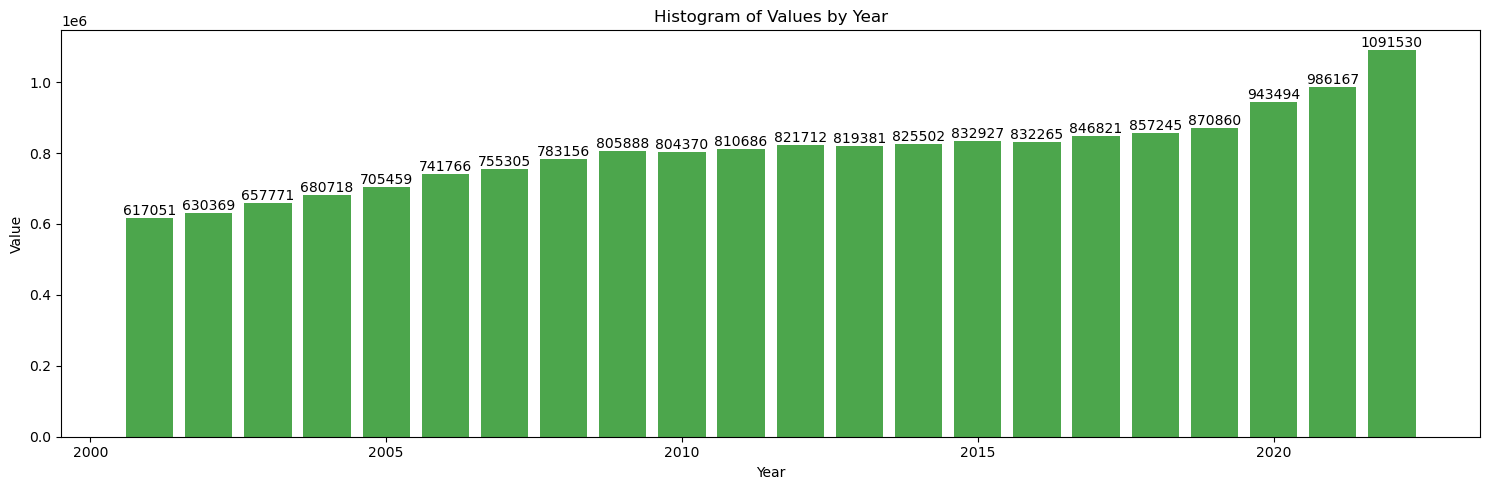

In [8]:
plt.figure(figsize=(15, 5))
bars = plt.bar(data_filtered['Year'], data_filtered['Value'], color='green', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 2), ha='center', va='bottom', color='black', fontsize=10)

plt.title('Histogram of Values by Year')
plt.xlabel('Year')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

In [9]:
data_costi = pd.read_excel("FAO/fadn spese (2).xlsx")
data_costi

,Year,Member State,(SE206) Total output livestock & livestock products (€/farm),(SE270) Total Inputs (€),(SE131) Total output (€/farm),(SE132) Total output / Total input (ratio)
0,2011,(IT) Italy,14544,35851,53138,1.48
1,2012,(IT) Italy,18099,40694,59543,1.46
2,2013,(IT) Italy,16784,40822,57940,1.42
3,2014,(IT) Italy,22524,47720,74035,1.55
4,2015,(IT) Italy,20496,45935,71030,1.55
5,2016,(IT) Italy,22349,45403,71323,1.57
6,2017,(IT) Italy,20781,45076,70811,1.57
7,2018,(IT) Italy,21628,49694,75830,1.53
8,2019,(IT) Italy,21373,50682,74574,1.47
9,2020,(IT) Italy,23412,51438,77437,1.51


In [10]:
data_costi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Year                                                          12 non-null     int64  
 1   Member State                                                  12 non-null     object 
 2   (SE206) Total output livestock & livestock products (€/farm)  12 non-null     int64  
 3   (SE270) Total Inputs (€)                                      12 non-null     int64  
 4   (SE131) Total output (€/farm)                                 12 non-null     int64  
 5   (SE132) Total output / Total input (ratio)                    12 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 708.0+ bytes


In [11]:
data_costi.dtypes

Year                                                              int64
Member State                                                     object
(SE206) Total output livestock & livestock products (€/farm)      int64
(SE270) Total Inputs (€)                                          int64
(SE131) Total output (€/farm)                                     int64
(SE132) Total output / Total input (ratio)                      float64
dtype: object

In [12]:
null_zeros_count = (data_costi == 0).sum() + data_costi.isnull().sum()
null_zeros_count

Year                                                            0
Member State                                                    0
(SE206) Total output livestock & livestock products (€/farm)    0
(SE270) Total Inputs (€)                                        0
(SE131) Total output (€/farm)                                   0
(SE132) Total output / Total input (ratio)                      0
dtype: int64

In [13]:
data_costi['Year'] = pd.to_numeric(data_costi['Year'], errors='coerce')
grouped_data = data_costi.groupby(['Year'])['(SE131) Total output (€/farm)'].sum().reset_index()

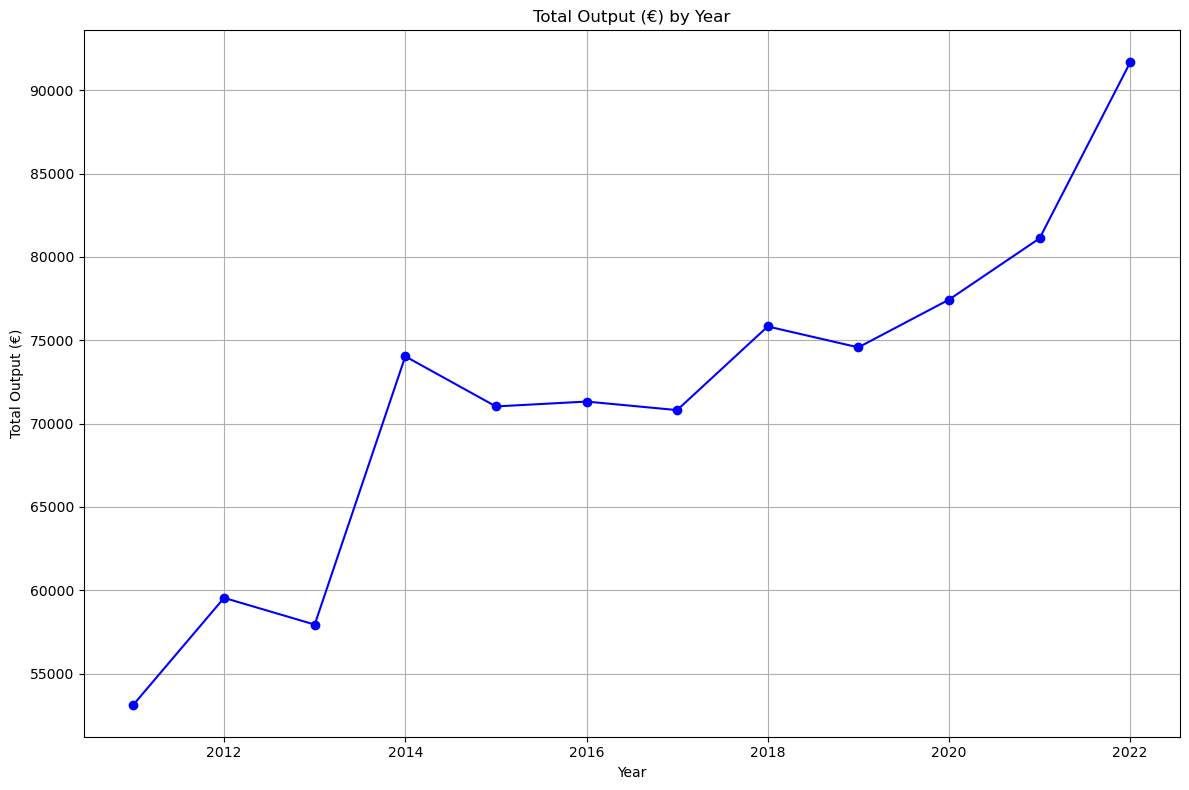

In [14]:
plt.figure(figsize=(12, 8))
plt.plot(grouped_data['Year'], grouped_data['(SE131) Total output (€/farm)'], marker='o', color='blue')

plt.title('Total Output (€) by Year')
plt.xlabel('Year')
plt.ylabel('Total Output (€)')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

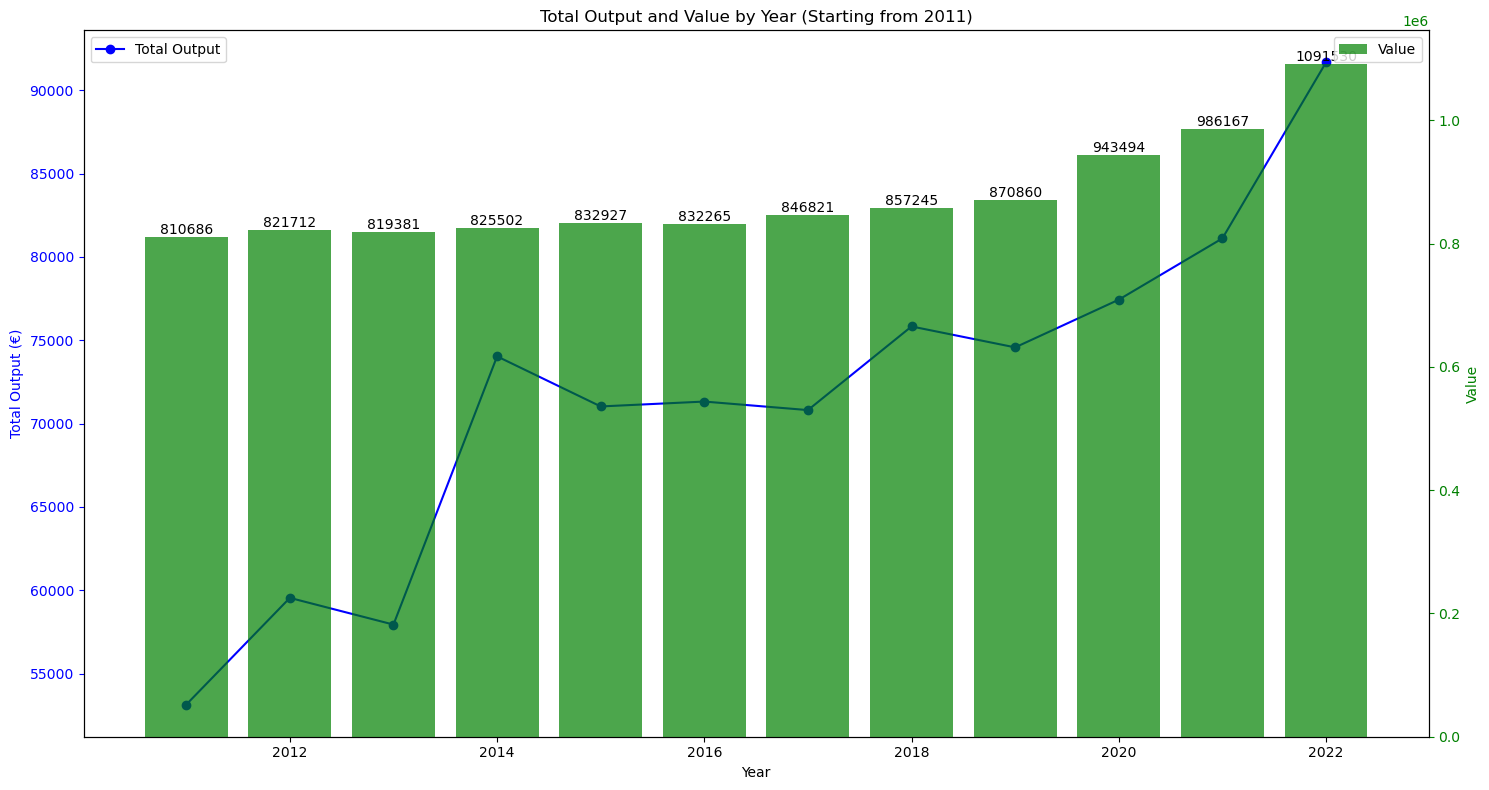

In [15]:
grouped_data_filtered = grouped_data[grouped_data['Year'] >= 2011]
data_filtered = data_filtered[data_filtered['Year'] >= 2011]

fig, ax1 = plt.subplots(figsize=(15, 8))

# Line plot for Total Output
ax1.plot(grouped_data_filtered['Year'], grouped_data_filtered['(SE131) Total output (€/farm)'], marker='o', color='blue', label='Total Output')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Output (€)', color='blue')
ax1.tick_params('y', colors='blue')
ax1.legend(loc='upper left')

# Create another axis for the bar plot
ax2 = ax1.twinx()

# Bar plot for data_filtered
bars = ax2.bar(data_filtered['Year'], data_filtered['Value'], color='green', alpha=0.7, label='Value')

# Display values on top of bars
for bar in bars:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 2), ha='center', va='bottom', color='black', fontsize=10)

ax2.set_ylabel('Value', color='green')
ax2.tick_params('y', colors='green')
ax2.legend(loc='upper right')

plt.title('Total Output and Value by Year (Starting from 2011)')
plt.tight_layout()
plt.show()


Da questo grafico possiamo evincere che gli aiuti statali, nel 2022, non hanno coperto le spese minime, a cui si accennava riguardo la tutela di un lavoro con una stagionalità molto marcata, per garantire che il settore agricolo potesse riuscire a far fronte ad una crescita senza il peso dei costi di produzione.

Cosa possiamo dire invece del 2023?
Il rapporto annuo di AGRIcoltura100 riporta sondaggi che mostrano l'altissima preoccupazione dovuto ad un aumento dei costi di produzione che non accenna a diminuire. 
Dal 1 gennaio al 31 dicembre 2023 sono stati erogati fondi per gli interventi dello sviluppo rurale pari a 21.243,12 milioni di euro, corrispondenti a 10.727,9 milioni di euro di quota comunitaria FEASR e NGEU. Ovvero, una leggera diminuizione del precedente anno, a conferma del fatto che la distribuzione di benefici fiscali non è rappresentantiva degli investimenti cumulati in ambito agricolo, ma che è una strategia finanziaria che non mette l'aspetto agricolo al primo posto. Rispetto all'aumento dei costi di produzione, l'ISTAT stima una spesa di 73,5 miliardi di euro, +2,7% rispetto al 2022.
Ci troviamo quindi in una situazione di profondissima tensione, confermata anche dai sondaggi riportati dal precedente testo. 


![](percezione_problemi.png)

Diversi aspetti sempre legati alla PAC e al nuovo piano di finanziamenti per il 2023-2027 mettono in luce problematiche legate alla ridistribuzione delle risorse allocate dall'Unione Europea nel contesto italiano, per mano di decisioni governative lasciate gestire in autonomia dalla EU. 

In [ ]:
## Quali altri effetti e ricadure ha 

## Il ruolo del Fisco nel mondo agricolo
##### In ambito fiscale, sono ben tre le esplicite richieste degli agricoltori italiani.

5- DETASSAZIONE IN AGRICOLTURA ( IRPEF-IMU ). Mantenere un regime fiscale adeguato per il mondo agricolo, viste le criticità economiche causate dall’aumento esponenziale dei costi di produzione e dalla flessione dei mercati dei prodotti agricoli. 

6- AGEVOLAZIONI CARBURANTE AGRICOLO. Mantenere anche dopo il 2026, il sistema che tiene calmierati i costi del gasolio agricolo

8- RIFORMA ALIQUOTA IVA APPLICATA. Ridurre o addirittura togliere l’iva su alcuni prodotti alimentari primari. Per il vino applicare un’aliquota massima del 10%.

A febbraio di quest'anno, metre il resto degli stati europei si pronunciavano in modo restrittiva sulle agevolazioni economiche richieste dagli agricoltori, l'Italia ha pubblicato con il decreto Milleproroghe una importante riduzione dell'Irpef, che tocca da vicino gli agricoltori. Per il biennio 2024-2025, infatti, i redditi agricoi fino a 10000€ saranno completamente esonerati, mentre quelli fino a 15000 dovranno pagare solo il 50% dell'imposta prevista. 
Il "contributo agricoltura", poi, si impegna nel fornire aiuti economici alle aziende per acquistare macchinari più idonei rispetto alle misure EU - meno inquinanti, con tracciadmenti satellitari e sistemi di condivisione dati. Anche in questo caso si tratta di agevolazioni in agricoltura a fondo perduto, questa volta dal 65% fino all’80% delle spese agevolabili per l’acquisto di macchinari e attrezzature per l’agricoltura di precisione, ma anche per la sostituzione dei veicoli fuoristrada per agricoltura e zootecnica e innovazione dei sistemi di irrigazione e gestione delle acque.

Eppure, non si possono fare considerazioni senza valutare la situazione fiscale, che si riflette sulle discrepanze di aiuti ricevuti visti in precedenza.

Il governo Meloni è partito da una riduzione delle aliquote, che scenderanno da 4 a 3 per arrivare (entro fine legislatura) ad una effettiva flat tax. 
La flat tax italiana è un regime fiscale che prevede una tassa unica e proporzionale sull'intero reddito, indipendentemente dal livello di reddito del contribuente. Questo sistema fiscale mira a semplificare il sistema tributario, eliminando le diverse aliquote progressive presenti nel sistema fiscale tradizionale. Ma per attuare questo passaggio, sono necessarie finanze.

Come stima l'Osservatorio CPI (Neri, Turati; 2024), <<se da una parte eventuali modifiche a queste detrazioni potrebbero contribuire a semplificare l’imposta (se si riducesse il numero delle agevolazioni), dall’altra avrebbero qualche marginale effetto negativo sulla redistribuzione e un impatto relativamente contenuto sui conti pubblici>>.

Al contempo, le voci fiscali erariali in Italia continuano a crescere, portando ad una situazione schizofrenica con possibili ricadute sulla spesa pubblica, in cui anche gli agricoltori vedrebbero una fetta di aiuti sacrificata.
Infatti, se le riduzioni delle aliquote non sono bilanciate dall'aumento delle entrate attraverso altre fonti, come l'eliminazione di evasione fiscale o l'incremento delle basi imponibili, potrebbe verificarsi una diminuzione netta delle entrate fiscali dello Stato.Inoltre, lL'equità fiscale potrebbe essere messa in discussione se le riduzioni delle aliquote e le voci fiscali erariali non sono distribuite in modo equo tra i diversi gruppi di reddito. Le agevolazioni fiscali potrebbero beneficiare principalmente i contribuenti ad alto reddito, mentre le aliquote ridotte potrebbero non avere un impatto significativo sui contribuenti a basso reddito.




In [19]:
voci_erariali= pd.read_excel("Voci erariali.xlsx")
voci_erariali

,Voci Erariali,2016,2017,2018,2019,2020,2021,2022,2023
0,Agevolazioni fiscali erariali (t),444,466,513,533,602,592,626,NaN
1,Minor gettito erariale (t+l) (mld €),NaN,"47,8","54,6","61,7","62,4","68,1","83,2","82,0"
2,Agevolazioni fiscali locali (t),166,170,197,180,184,129,114,NaN
3,Minor gettito locale (t+l) (mld 6),NaN,"39,5","35,3","42,3",44.8,"44,2",454,"43,6"
4,Totale agevolazioni (t),610,636,710,713,786,721,740,NaN
5,Totale minor gettito (t+l) (mld C),NaN,"87,3","89,9","104,0","107,2","112,3","128,6","125,6"
6,Pil nominale tendenziale (mld €),"1.689,7","1.736,6","1.771,1","1.794,9","1.660,6","1.782,1","1.903,3","1.990,2"
7,Minor gettito in % al Pil,NaN,"5,0","5,1","5,8","6,5","6,3","6,8","6,3"


In [21]:
voci_erariali_transposed = voci_erariali.transpose()

voci_erariali_transposed.columns = voci_erariali_transposed.iloc[0]
voci_erariali_transposed = voci_erariali_transposed[1:]

voci_erariali_transposed.reset_index(inplace=True)
voci_erariali_transposed.rename(columns={'index': 'Year'}, inplace=True)

voci_erariali_transposed = voci_erariali_transposed.apply(pd.to_numeric, errors='coerce')

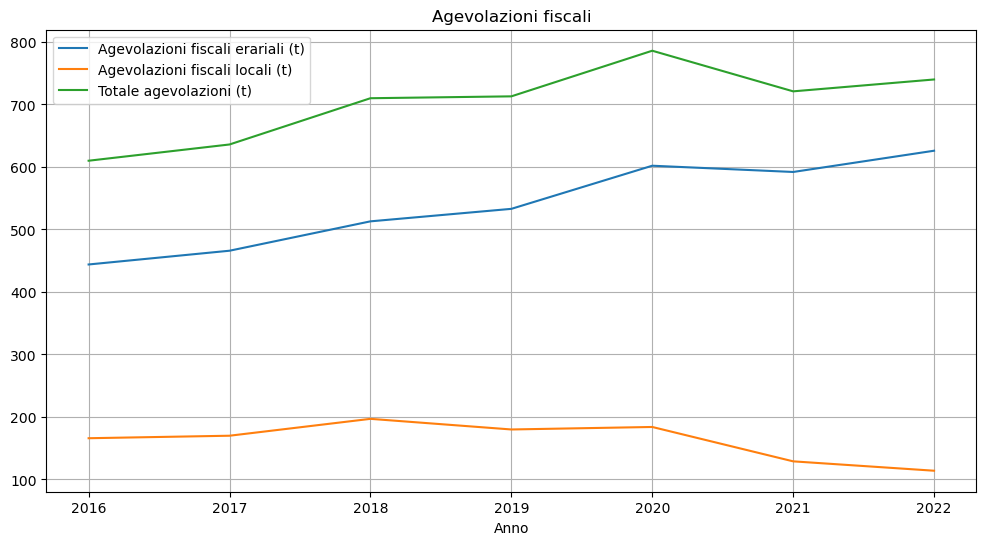

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(voci_erariali_transposed['Year'], voci_erariali_transposed['Agevolazioni fiscali erariali (t)'], label='Agevolazioni fiscali erariali (t)')
plt.plot(voci_erariali_transposed['Year'], voci_erariali_transposed['Agevolazioni fiscali locali (t)'], label='Agevolazioni fiscali locali (t)')
plt.plot(voci_erariali_transposed['Year'], voci_erariali_transposed['Totale agevolazioni (t)'], label='Totale agevolazioni (t)')

plt.title('Agevolazioni fiscali')
plt.xlabel('Anno')
plt.legend()
plt.grid(True)

plt.show()

Le Agevolazioni Fiscali Erali (Erariali) sono gestite a livello statale (erariale) e sono stabilite dal governo centrale o dalle autorità fiscali nazionali, con un raggio di influenza sull'imposta sul reddito delle persone fisiche e giuridiche, l'Iva, e altre imposte dirette e indirette.

Le Agevolazioni Fiscali Locali, invece, sono gestite a livello locale, cioè da regioni, province, comuni o altri enti locali.
Sono spesso mirate a incentivare attività economiche locali, promuovere lo sviluppo regionale, o fornire sostegno a specifici settori o categorie di contribuenti a livello locale, come possono essere agricoltori in zone diverse del paese.
Gli esempi possono includere esenzioni o riduzioni dell'Imposta Municipale Propria (IMU), tasse sulla proprietà, tasse locali sulle attività commerciali, e altre agevolazioni fiscali introdotte dalle autorità locali.

Ma la loro presenza non ne garantisce l'attuazione. Come si ribadiva, se le agevolazioni non sono ben mirate, possono beneficiare principalmente i contribuenti ad alto reddito o determinati settori a discapito di altri, aumentando le disuguaglianze e rendendo il sistema fiscale meno equo.
Inoltre, le agevolazioni fiscali riducono direttamente il gettito fiscale, diminuendo le risorse disponibili per finanziare i servizi pubblici e gli investimenti pubblici. Infatti, il "minor gettito entrante" dimostra una crescita di perdita all'interno dello stato, con le ripercussioni di cui sopra.a.

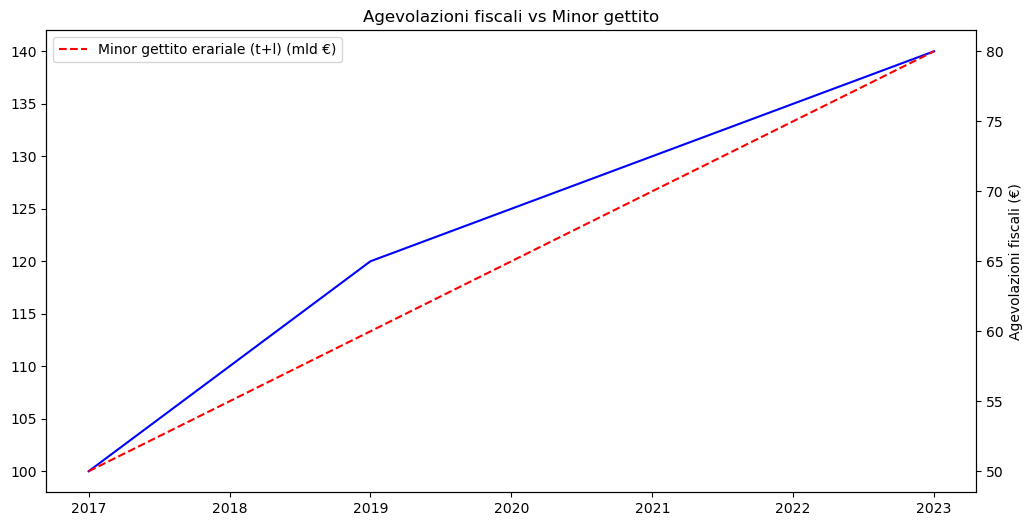

In [30]:
plt.figure(figsize=(12, 6))

plt.plot(data['Year'], data['Agevolazioni fiscali erariali (t)'], label='Agevolazioni fiscali erariali (t)', color='blue')

plt.twinx()
plt.plot(data['Year'], data['Minor gettito erariale (t+l) (mld €)'], label='Minor gettito erariale (t+l) (mld €)', color='red', linestyle='--')

plt.title('Agevolazioni fiscali vs Minor gettito')
plt.xlabel('Anno')
plt.ylabel('Agevolazioni fiscali (€)')
plt.legend(loc='upper left')

plt.show()

Misure come la riduzione dell'IVA, richiesta dagli agricoltori, porterebbero benefici a breve termine, dal momento che la pressione fiscale si farebbe sentire poi con effetti legati alla continua riduzione di assistenza, generando un cortocircuito. Ad esempio, quelle legate al carburante agricolo.

Vediamo nel dettaglio in cosa consistono le misure pratiche, in ambito agricolo, legate alla transizione ecologica e per cui sia gli stati sia l'Europa si impegnano a garantire fondi. 